In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
%matplotlib inline

In [2]:
pd.__version__

'0.24.2'

In [3]:
sns.__version__

'0.9.0'

In [21]:
df2= pd.read_csv("../Chris/sales_data.csv")

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 4 columns):
ts            16290 non-null object
country       16290 non-null object
brand         16290 non-null object
unit_price    16290 non-null float64
dtypes: float64(1), object(3)
memory usage: 509.1+ KB


In [23]:
df2.head()

,ts,country,brand,unit_price
0,2019-04-01T00:11:04,BE,pepsi,2.2
1,2019-04-01T00:11:04,BE,pepsi,2.2
2,2019-04-01T00:32:20,NL,coca-cola,2.7
3,2019-04-01T00:32:40,DE,coca-cola,2.6
4,2019-04-01T00:33:58,DE,coca-cola,2.6


In [24]:
type(df2.ts[0])

str

In [25]:
df2['ts'] = pd.to_datetime(df2['ts'])

In [26]:
df2.head()

,ts,country,brand,unit_price
0,2019-04-01 00:11:04,BE,pepsi,2.2
1,2019-04-01 00:11:04,BE,pepsi,2.2
2,2019-04-01 00:32:20,NL,coca-cola,2.7
3,2019-04-01 00:32:40,DE,coca-cola,2.6
4,2019-04-01 00:33:58,DE,coca-cola,2.6


In [27]:
df2.drop_duplicates(inplace = True)

In [28]:
df2.head()

,ts,country,brand,unit_price
0,2019-04-01 00:11:04,BE,pepsi,2.2
2,2019-04-01 00:32:20,NL,coca-cola,2.7
3,2019-04-01 00:32:40,DE,coca-cola,2.6
4,2019-04-01 00:33:58,DE,coca-cola,2.6
5,2019-04-01 00:44:11,DE,coca-cola,3.5


In [29]:
# Firstly, let's take a look at the general picture, afterwards we can dive into the details

/home/sony/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


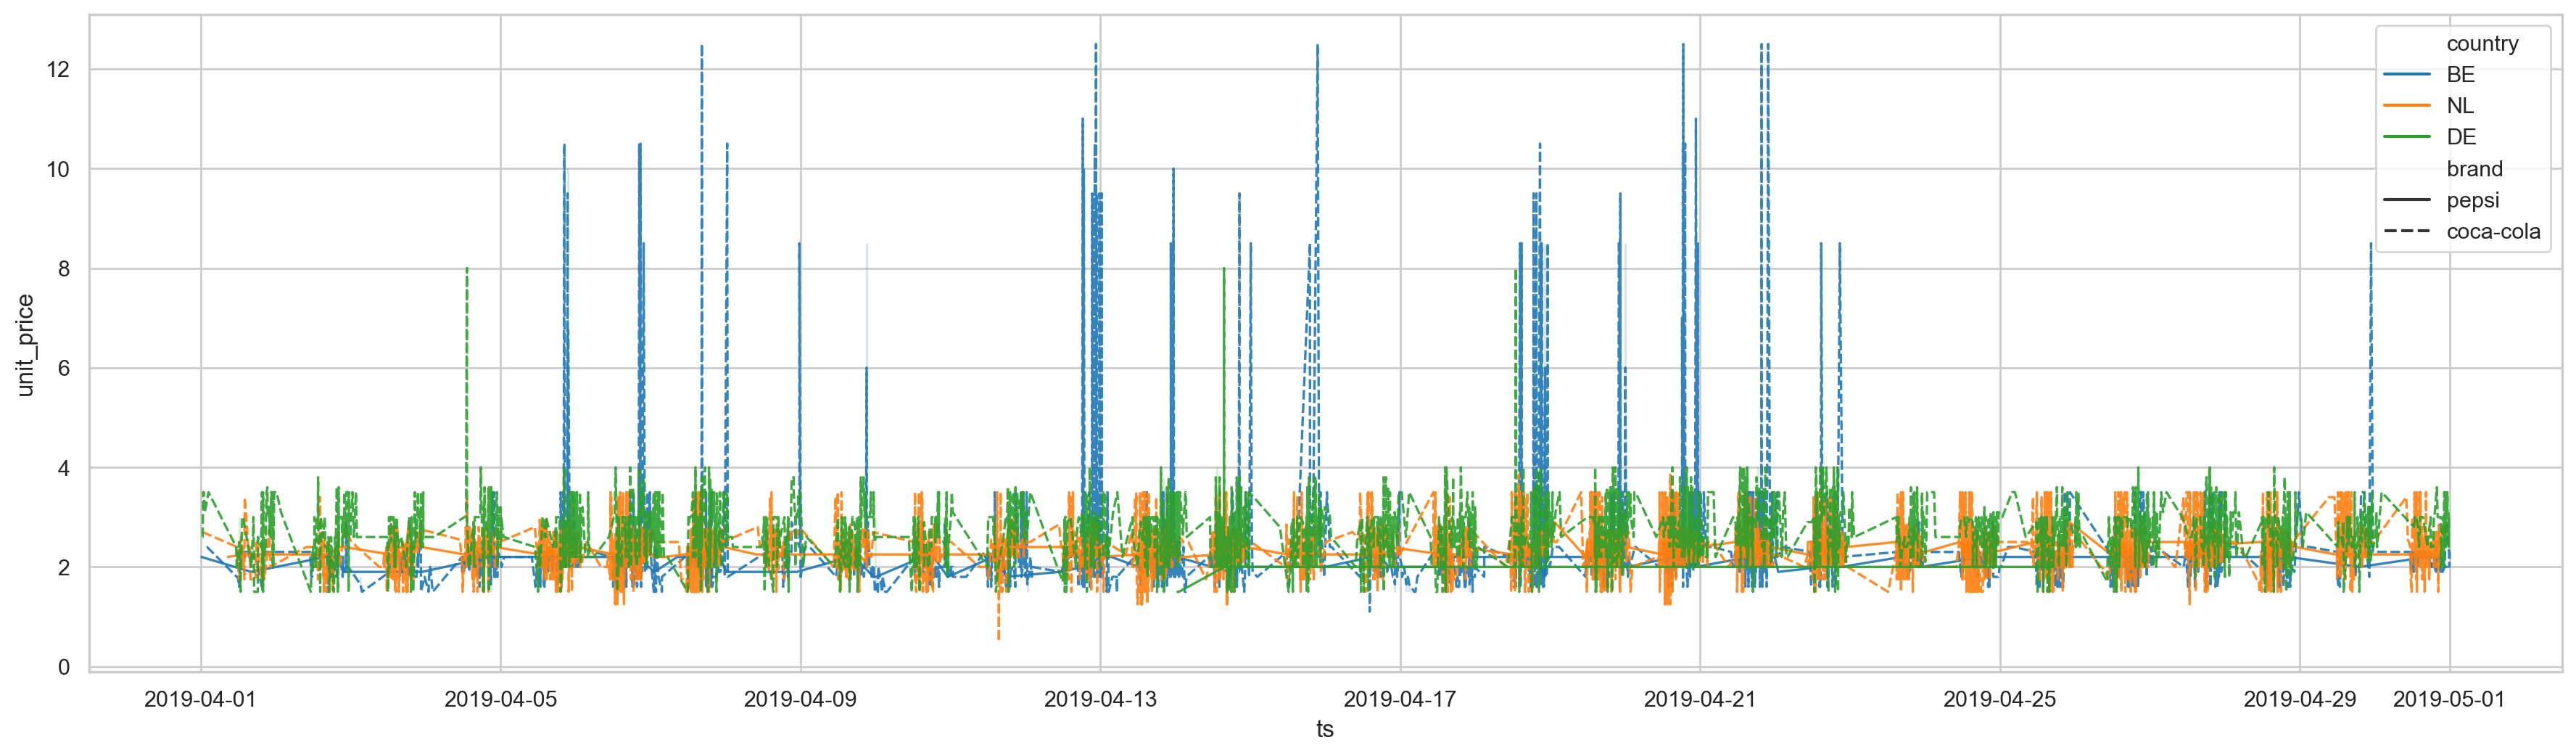

In [30]:
plt.figure(figsize=(22, 6), dpi = 200)
sns.set(style="whitegrid")


sns.lineplot(data = df2, x='ts',y='unit_price',hue = 'country', style = 'brand', 
             alpha = 0.9, palette="tab10", linewidth=1.2 )

-Prices in Belgium (particularly Coca-cola) can occassionally spike to extreme values, to a lesser extent Germany

In [31]:
#Perhaps too much data in one plot, a little bit hard to see. I'm separating them by countries

In [32]:
# Need to transform the long dataset to a semi-long format

In [33]:
df2_pivoted = df2.pivot_table(index = ['ts', 'brand'], columns =['country'], values = 'unit_price')

In [34]:
df2_pivoted = df2_pivoted.reset_index()

In [35]:
df2_pivoted.head()

country,ts,brand,BE,DE,NL
0,2019-04-01 00:11:04,pepsi,2.2,NaN,NaN
1,2019-04-01 00:32:20,coca-cola,NaN,NaN,2.7
2,2019-04-01 00:32:40,coca-cola,NaN,2.6,NaN
3,2019-04-01 00:33:58,coca-cola,NaN,2.6,NaN
4,2019-04-01 00:44:11,coca-cola,NaN,3.5,NaN


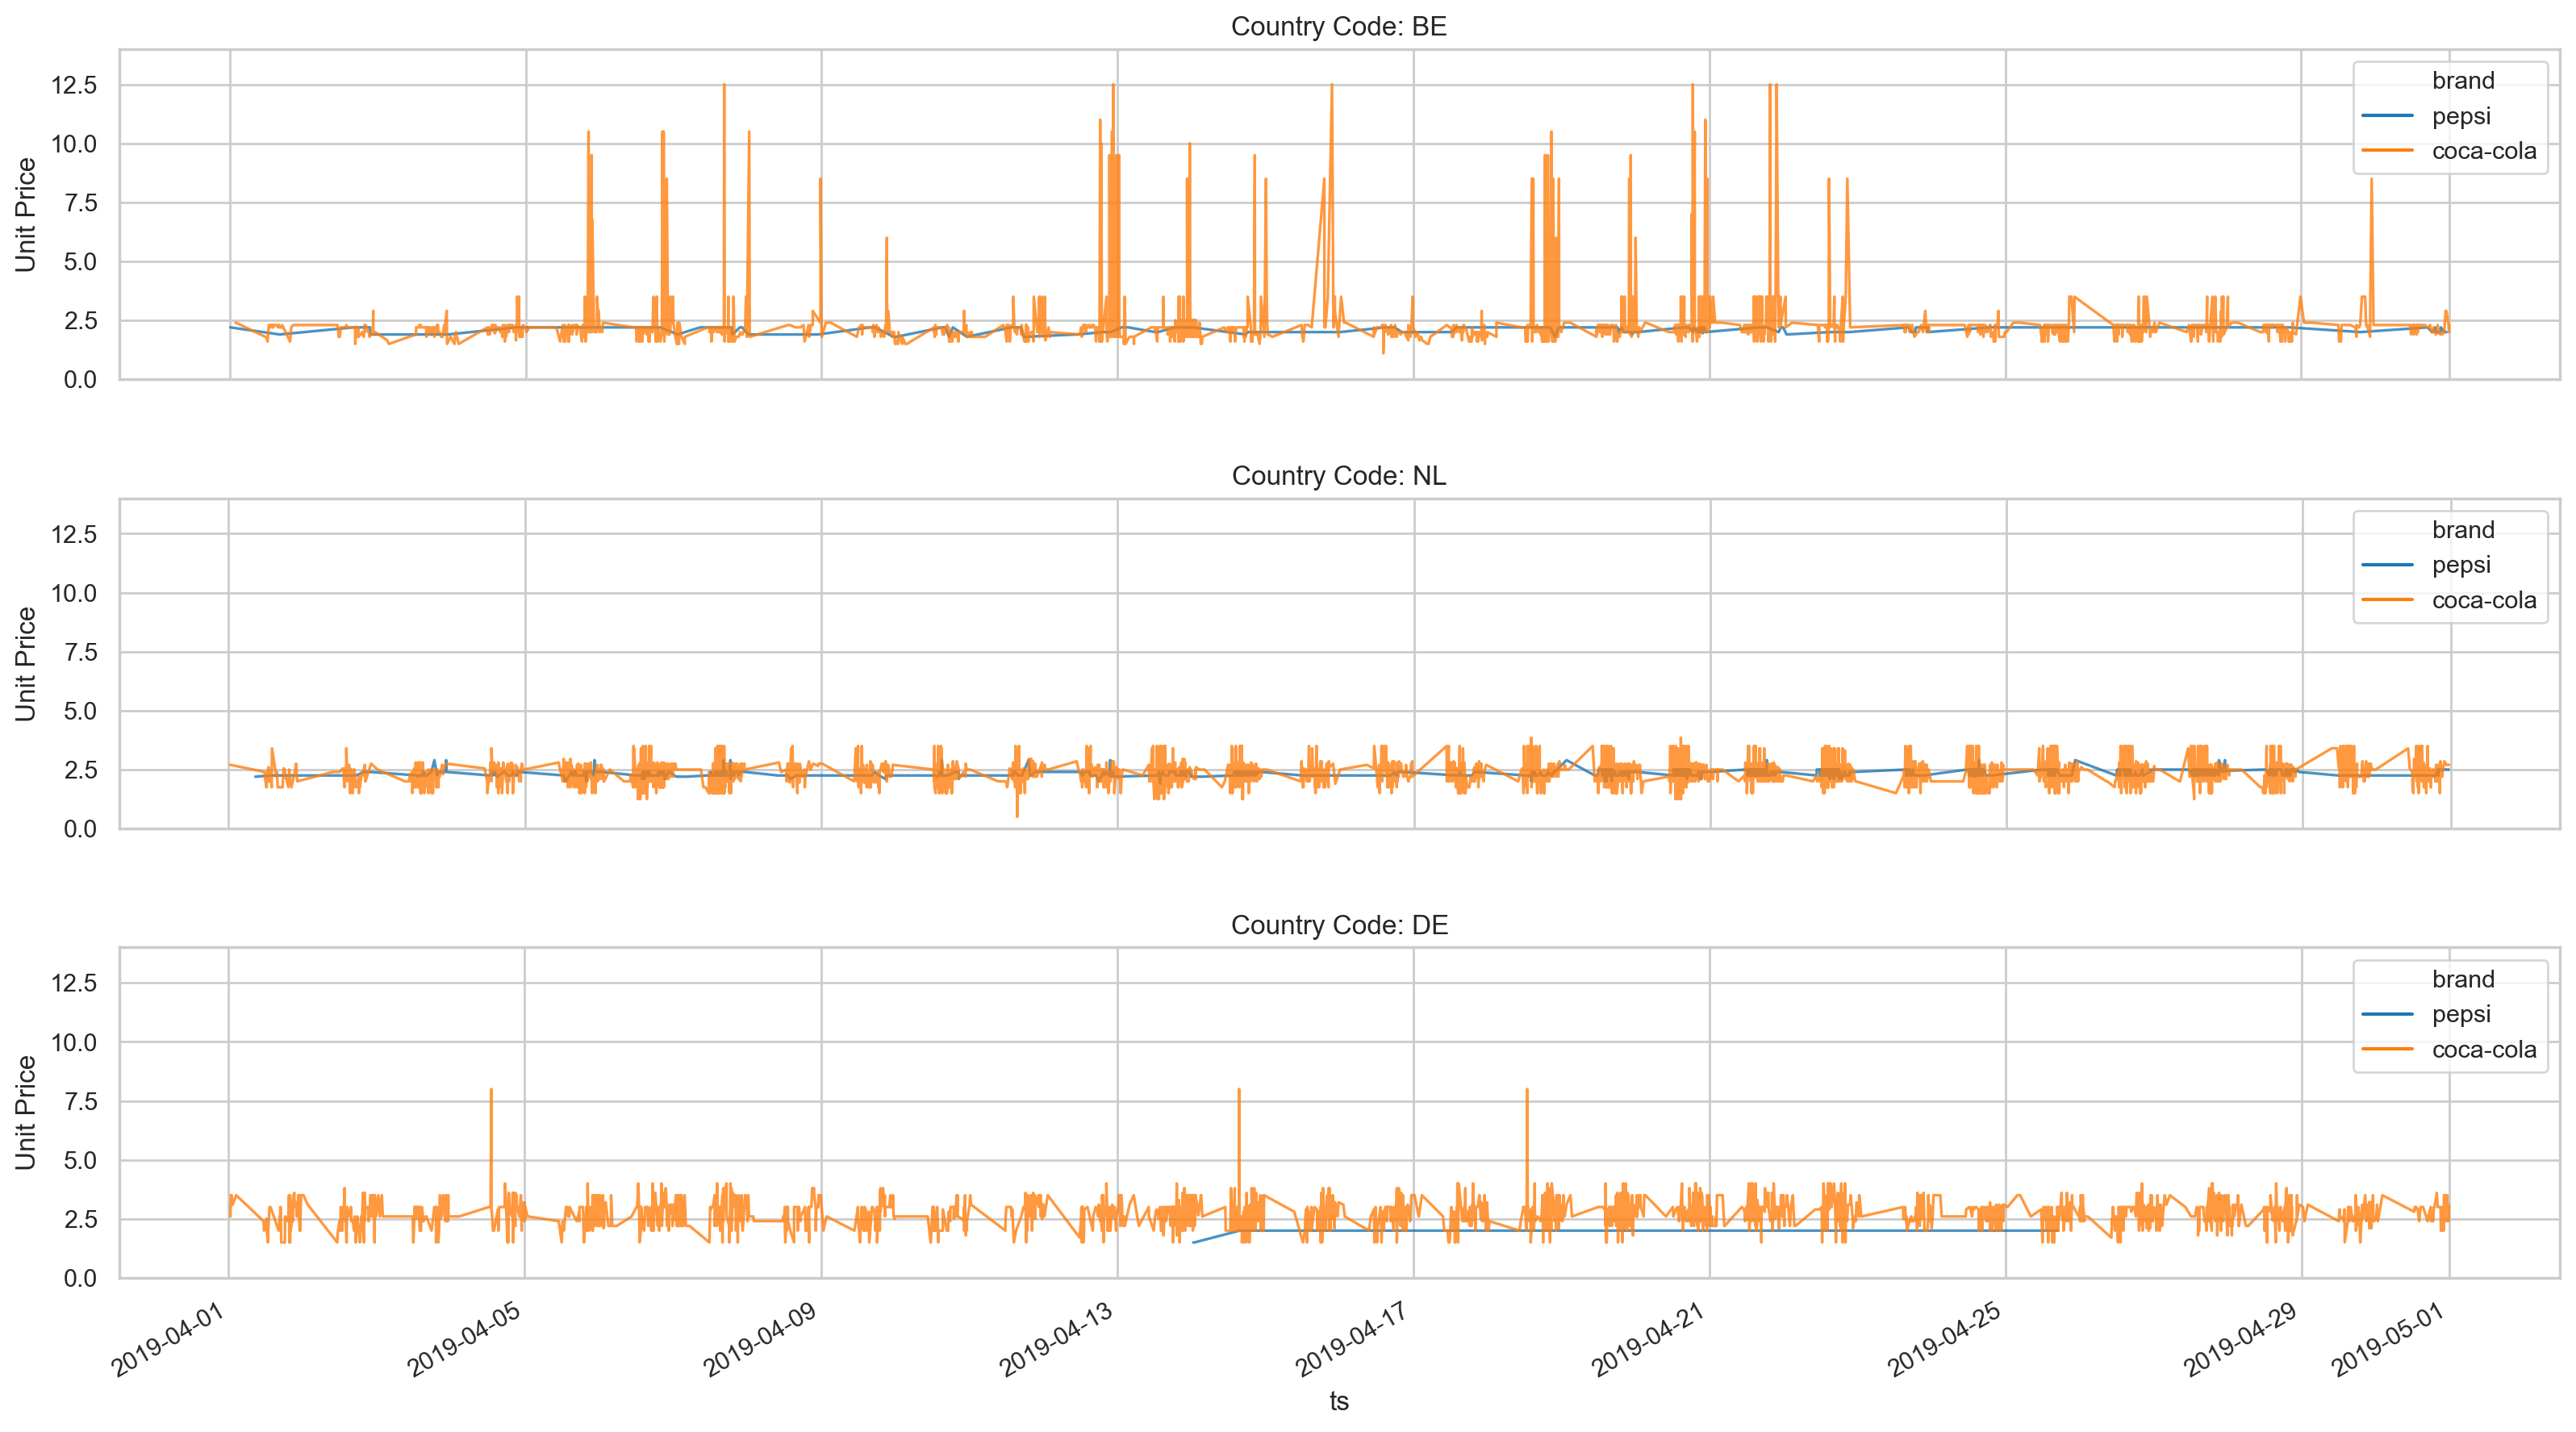

In [36]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (16,10), dpi = 200)

t=0
for col in ['BE','NL','DE']:
    
    sns.lineplot(data = df2_pivoted.loc[:,:col], x='ts',y= col ,hue = 'brand', 
             alpha = 0.8, palette="tab10", linewidth=1.2, ax = axes[t] )
    axes[t].set_ylim([0,14])
    axes[t].set_ylabel('Unit Price')
    axes[t].set_title('Country Code: '+ col)
    t +=1
plt.tight_layout()
fig.autofmt_xdate()

OBSERVATIONS:


-Prices of Pepsi are a lot more stable than Coca-Cola in all countries


-Some kind of seasonality for Coca-cola prices (We will get back to this)
--It is worth investing when exactly the prices are more volatile -> Days of week or certain time period of the day

In [37]:
#Returning to the original dataset (Wide format)

In [38]:
df2.head()

,ts,country,brand,unit_price
0,2019-04-01 00:11:04,BE,pepsi,2.2
2,2019-04-01 00:32:20,NL,coca-cola,2.7
3,2019-04-01 00:32:40,DE,coca-cola,2.6
4,2019-04-01 00:33:58,DE,coca-cola,2.6
5,2019-04-01 00:44:11,DE,coca-cola,3.5


In [39]:
df2.groupby(['country']).agg(['mean','var','count','min','max'])

unit_price                            
              mean       var count  min    max
country                                       
BE        2.315004  1.301611  2506  1.1  12.50
DE        2.729487  0.330134  2591  1.5   8.00
NL        2.333775  0.123383  6903  0.5   3.85

-It appears that the sale prices are on average more expensive in Germany compared to the Netherlands or Belgium.


-Beverage prices in Belgium are comparable to those in the Netherlands

-Much more data observations for NL compared to BE or DE

-Beverage prices in Belgium are a lot more volatile

-Prices in Belgium and Germany can get very high, it might be worth it to investigate why this is the case from a marketing standpoint

Text(0.5, 1.0, 'Mean beverage price by day of Month')

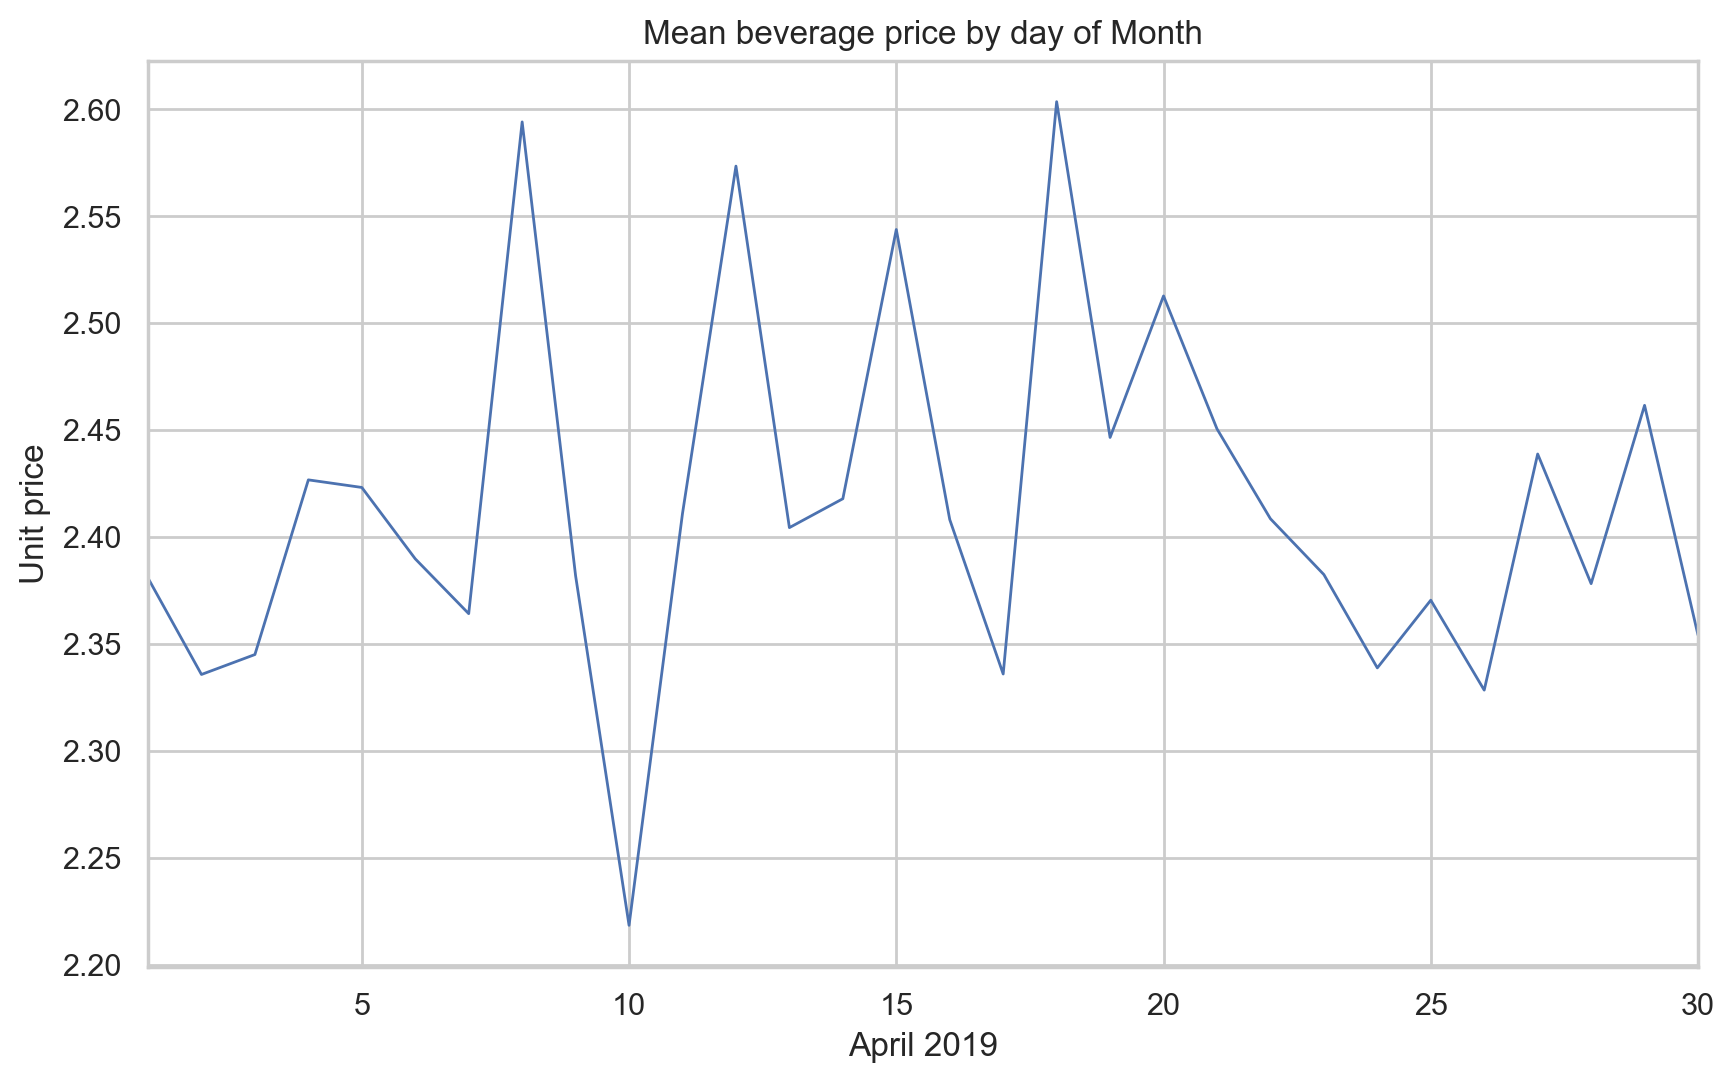

In [40]:
plt.figure(dpi = 200)
ax = df2.groupby(df2.ts.dt.day)['unit_price'].mean().plot(linewidth =1, figsize=(10,6))
ax.set_xlabel('April 2019')
ax.set_ylabel('Unit price')
ax.set_title('Mean beverage price by day of Month')

- It appears that in certain days of the month prices are higher than others. We will show later that this has to do with some weekend effect, mainly driven by late night purchases for certain days of the week

In [41]:
df2[df2.unit_price >7].sample(10) # Taking some random sample of those with high sale prices

,ts,country,brand,unit_price
7700,2019-04-18 18:41:50,BE,coca-cola,9.5
1385,2019-04-05 21:23:49,BE,coca-cola,9.5
8772,2019-04-19 22:28:31,BE,coca-cola,9.5
4726,2019-04-12 18:42:15,BE,coca-cola,10.0
7484,2019-04-18 13:00:00,DE,coca-cola,8.0
9816,2019-04-20 23:18:31,BE,coca-cola,8.5
2079,2019-04-06 20:21:21,BE,coca-cola,10.5
1348,2019-04-05 20:23:26,BE,coca-cola,10.5
2160,2019-04-06 21:45:48,BE,coca-cola,8.5
6501,2019-04-15 00:09:15,BE,coca-cola,8.5


-Timestamps seem to indicate that these purchases occurred mainly in the later p.m. Need to compare with the full dataset

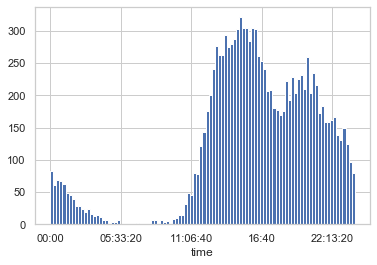

In [42]:
df2.ts.dt.time.hist(bins=100) # All observations

-This histogram explains the "seasonality" we observed earlier. People drink colas mostly in the p.m. Apparently some minority of people do have them for breakfast!

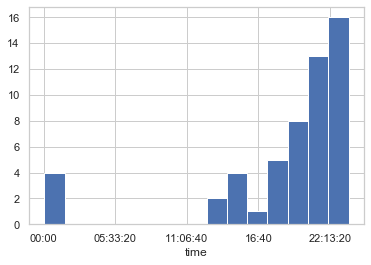

In [43]:
df2[df2.unit_price >7]['ts'].dt.time.hist(bins=15) # High price observations, more than 7 euros benchmark

-Most high price observations overwhelmingly occur in the late p.m at night. Whereas in the entire dataset, the majority of prices are observed in the early p.m. Again, might be worth investigating why this is the case.

-It is possible that in the late p.m., supermarkets are closed and therefore customers are obliged to buy them at night shops that are most often sold at a premium

- For instance, one might want to investigate whether supermarkets close earlier in Belgium or nightshops in Belgium tend sell at higher prices compared to other countries

Text(0, 0.5, 'Frequency')

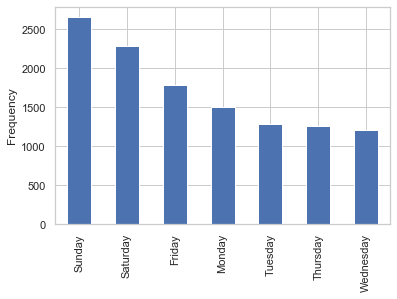

In [44]:
ax = df2.ts.dt.day_name().value_counts().plot(kind='bar') # Entire dataset
ax.set_ylabel('Frequency')

-In the entire sample, most sale observations occur over the weekend. This is highly expected since most people by convention spend leisure during this part of the week. Drinking colas, I guess, is also a leisure activity.

Text(0, 0.5, 'Frequency')

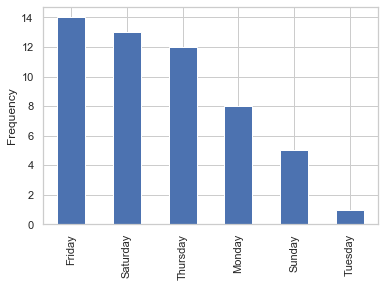

In [45]:
ax = df2[df2.unit_price >7]['ts'].dt.day_name().value_counts().plot(kind='bar') # High price observations
ax.set_ylabel('Frequency')

-High price observations (more than 7 euros unit price; I pick this arbritarily but one can also use a more sophisticate method like: third quartile + 1.5*(Interquartile Range) ) mostly occur on Friday. Interestingly, high prices for the beverage are never observed on Wednesday!

-High price observations rarely occur on Sunday, whereas most purchases actually occur on Sunday, according to the main dataset

In [46]:
df2.groupby(['country','brand']).agg(['mean','var','count','min','max'])

unit_price                            
                        mean       var count  min    max
country brand                                           
BE      coca-cola   2.333044  1.411084  2303  1.1  12.50
        pepsi       2.110345  0.014694   203  1.8   2.20
DE      coca-cola   2.733656  0.327657  2579  1.5   8.00
        pepsi       1.833333  0.060606    12  1.5   2.00
NL      coca-cola   2.327701  0.155498  5303  0.5   3.85
        pepsi       2.353906  0.016443  1600  1.9   2.90

-The cause of high beverage prices (in Belgium and Germany) stem from Coca-cola, not Pepsi.

-Inadequate Pepsi observations in Germany to make any statistical inference

-Coca-Cola is more expensive than Pepsi in Belgium and Germany but not in the Netherlands

In [47]:
pivoted_df = pd.pivot_table(df2,index = 'ts', columns =['brand','country'],values='unit_price')

In [48]:
pivoted_df.head()

brand               coca-cola           pepsi        
country                    BE   DE   NL    BE  DE  NL
ts                                                   
2019-04-01 00:11:04       NaN  NaN  NaN   2.2 NaN NaN
2019-04-01 00:32:20       NaN  NaN  2.7   NaN NaN NaN
2019-04-01 00:32:40       NaN  2.6  NaN   NaN NaN NaN
2019-04-01 00:33:58       NaN  2.6  NaN   NaN NaN NaN
2019-04-01 00:44:11       NaN  3.5  NaN   NaN NaN NaN

In [49]:
pivoted_df.corr() # CORRELATION MATRIX

brand             coca-cola                         pepsi               
country                  BE        DE        NL        BE   DE        NL
brand     country                                                       
coca-cola BE       1.000000 -0.928841  0.419486  0.798082  NaN -0.264135
          DE      -0.928841  1.000000  0.136551       NaN  NaN  0.816497
          NL       0.419486  0.136551  1.000000       NaN  NaN  0.368794
pepsi     BE       0.798082       NaN       NaN  1.000000  NaN       NaN
          DE            NaN       NaN       NaN       NaN  1.0       NaN
          NL      -0.264135  0.816497  0.368794       NaN  NaN  1.000000

-According to the correlation matrix, the sale price of Coca-cola in Belgium is negatively correlated with the sale price of Coca-cola in Germany with a Pearson's correlation of -0.92881. That is, their prices with high predictability move in the opposite direction, which is quite strange. At first sight, there should not be any reason why Coke price should move in the opposite direction between BE and DE. This is an opportunity for arbitrage I guess.

- On the other hand, Coke in NL is correlated with Coke in BE with 0.419486 which perhaps isn't too high. These two countries may be following different marketing strategies

-In Belgium, Pepsi is correlated with Coca-cola with a correlation of 0.798082. This may imply that both companies tend compete with each other in terms of prices (one cannot discount the possibility that they may also be attempting to collude in term of prices). 

In [50]:
pd.pivot_table(df2,index = 'ts', columns='brand', values = 'unit_price').corr() # CORRELATION MATRIX

brand,coca-cola,pepsi
brand,,
coca-cola,1.0000,0.3098
pepsi,0.3098,1.0000


-Overall, the correlation between Coca-cola and Pepsi in the three countries is only 0.3098. This insight might be informative for each counterpart as to how they should proceed with future competition and marketing strategy.

-  E.g. should Coca-cola and Pepsi continue not to compete in terms of price? Also, perhaps Coca-cola and Pepsi fear a 'price war', and this is the reason why they have not been competing in terms of prices

In [51]:
pivoted_df.head()

brand               coca-cola           pepsi        
country                    BE   DE   NL    BE  DE  NL
ts                                                   
2019-04-01 00:11:04       NaN  NaN  NaN   2.2 NaN NaN
2019-04-01 00:32:20       NaN  NaN  2.7   NaN NaN NaN
2019-04-01 00:32:40       NaN  2.6  NaN   NaN NaN NaN
2019-04-01 00:33:58       NaN  2.6  NaN   NaN NaN NaN
2019-04-01 00:44:11       NaN  3.5  NaN   NaN NaN NaN

In [52]:
pivoted_df = pivoted_df.reset_index()

In [53]:
pivoted_df['am_pm'] = pivoted_df.ts.dt.hour.apply(lambda x: 'a.m.' if x < 12 else 'p.m')

In [54]:
pivoted_df.set_index('ts', inplace = True)

In [55]:
am_pm_counts = pivoted_df.groupby(['am_pm']).count()
am_pm_counts

brand   coca-cola             pepsi         
country        BE    DE    NL    BE DE    NL
am_pm                                       
a.m.          286   411   347    18  4    87
p.m          1999  2081  4923   184  8  1509

In [56]:
am_percent = (am_pm_counts.loc['a.m.']/am_pm_counts.sum() )
am_percent*100

brand      country
coca-cola  BE         12.516411
           DE         16.492777
           NL          6.584440
pepsi      BE          8.910891
           DE         33.333333
           NL          5.451128
dtype: float64

Text(0.5, 1, 'A.m. Hours Drinking Rates')

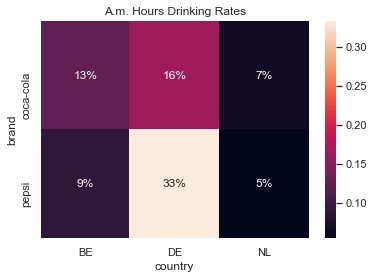

In [57]:
ax = sns.heatmap(am_percent.unstack('country'),annot= True, fmt='.0%' )
ax.set_title('A.m. Hours Drinking Rates')

-It appears that Germans, more than people in any other countries, tend to drink their colas in the morning (a.m. hours)

-The Dutch are the least likely to drink colas in the A.m. hours

-The mechanism behind this phenomenon could simply be just culture but it could also be due to the underlying infrastructure of the country

-  Shop opening hours (both duration and timing) regulations, main distributors, people's workhours, etc.

-P.S. The caveat is that one should not  take Pepsi 33% for DE at face value. Number of observations is too low to make statistical inference. 

Text(0.5, 1.0, 'Box Plot by Country and Brand')

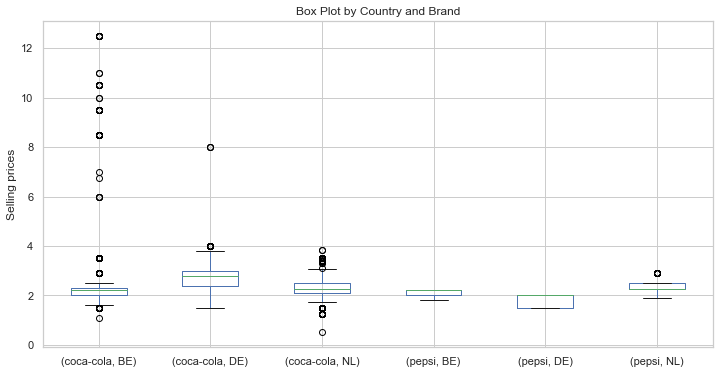

In [58]:
ax = pivoted_df.plot(kind='box', figsize=(12,6))
ax.set_ylabel('Selling prices')
ax.set_title('Box Plot by Country and Brand')


-Like discussed earlier, most of the (extreme) outliers occur for Coca-cola in Belgium

In [59]:
# Others

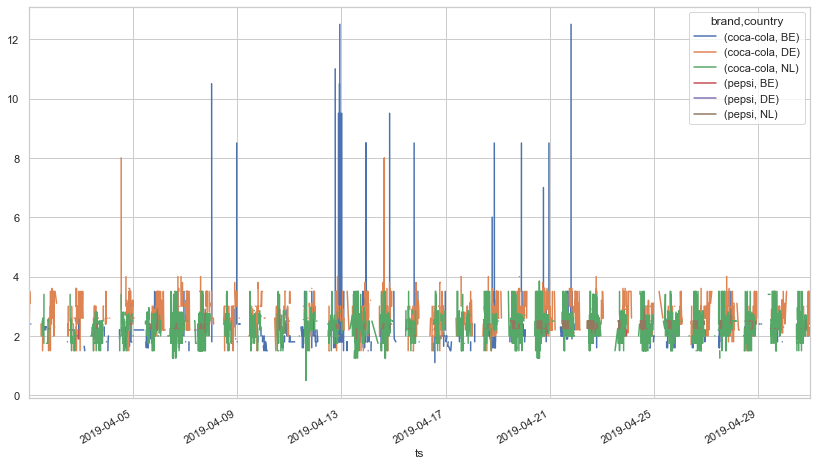

In [60]:
pivoted_df.plot(figsize=(14,8))